In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [2]:
df = pd.read_excel("/content/cust_data.xlsx")

In [3]:
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


**Basic Information:**

In [7]:
df.shape

(30000, 38)

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [4]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [ ]:
df.describe()

In [ ]:
df['Gender'].value_counts()

**1. Gender Distribution**

<ipython-input-5-e9597b505e22>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Gender', data=df, palette=["orange", "green"])


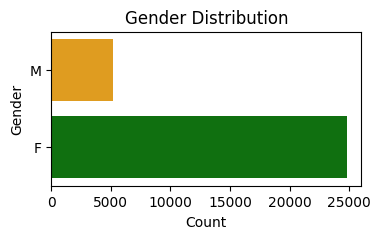

In [5]:
plt.figure(figsize=(4, 2))
sns.countplot(y='Gender', data=df, palette=["orange", "green"])
plt.title('Gender Distribution')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.show()
#

**The dataset shows that the majority of customers are female**






**2. Average Number of Orders by Gender**

<ipython-input-7-f4cf6e21c3d2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Orders', data=avg_orders_by_gender,palette=["purple", "green"])


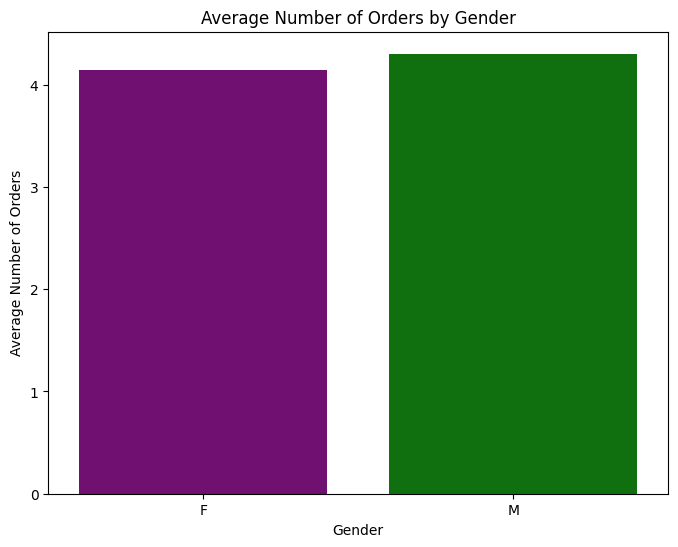

In [7]:
# Average number of orders by gender
avg_orders_by_gender = df.groupby('Gender')['Orders'].mean().reset_index()

# Plot the results
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Orders', data=avg_orders_by_gender,palette=["purple", "green"])
plt.xlabel('Gender')
plt.title('Average Number of Orders by Gender')
plt.ylabel('Average Number of Orders')
plt.show()


**On average, male customers place more orders compared to female customers.**

**3. Brand Preferences by Gender**

<Figure size 1500x800 with 0 Axes>

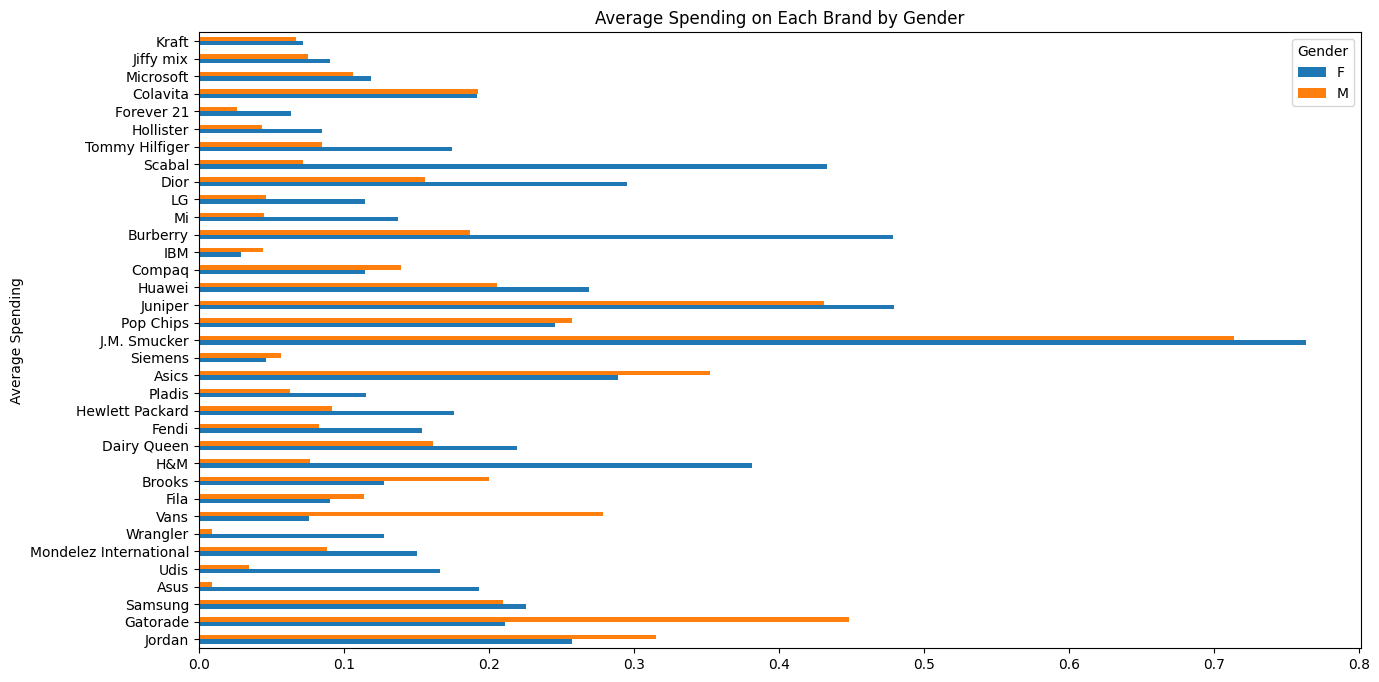

In [10]:
# Average spending on each brand by gender
brand_columns = df.columns[3:]

avg_spending_by_gender = df.groupby('Gender')[brand_columns].mean().reset_index()


# Plot the results for each brand
plt.figure(figsize=(15, 8))
avg_spending_by_gender.set_index('Gender').T.plot(kind='barh', figsize=(15, 8))
plt.title('Average Spending on Each Brand by Gender')
plt.ylabel('Average Spending')
plt.show()


**Female customers show a preference for Brand**

**4. Overall Spending Comparison**

<ipython-input-14-f6255cabb856>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Total_Spending', data=avg_total_spending_by_gender,palette=["lime", "red"])


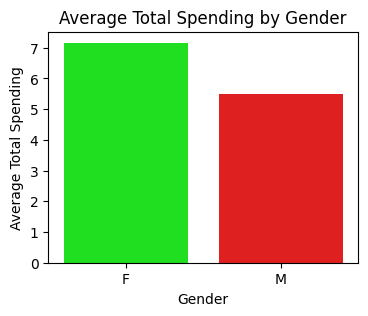

In [14]:
# Calculate total spending by summing across all brand columns
df['Total_Spending'] = df[brand_columns].sum(axis=1)

# Average total spending by gender
avg_total_spending_by_gender = df.groupby('Gender')['Total_Spending'].mean().reset_index()

# Plot the results
plt.figure(figsize=(4,3))
sns.barplot(x='Gender', y='Total_Spending', data=avg_total_spending_by_gender,palette=["lime", "red"])
plt.title('Average Total Spending by Gender')
plt.ylabel('Average Total Spending')
plt.show()


**Overall, female customers tend to spend more across all brands compared to their counterparts.**

**Distribution of Orders**

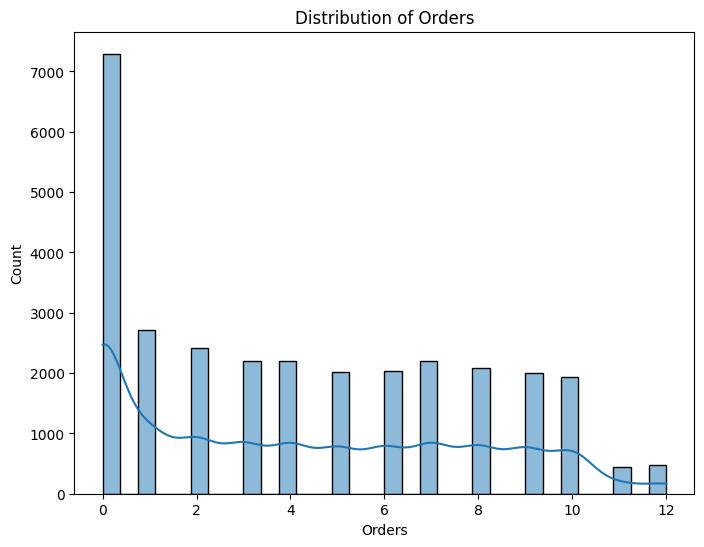

In [17]:
# 4. Distribution of Numerical Features
plt.figure(figsize=(8, 6))
sns.histplot(df['Orders'], kde=True)
plt.title('Distribution of Orders')
plt.show()

<ipython-input-34-c158bfa20f46>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Orders', data=df, palette="Set1")


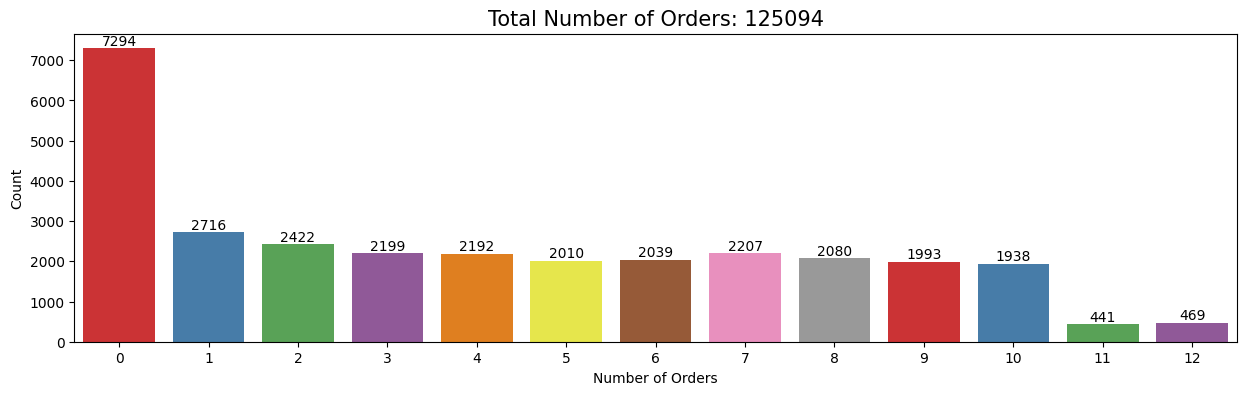

In [34]:
# Calculate the total number of orders
total_orders = df['Orders'].sum()

# Plotting the count of orders from 0 to 12
plt.figure(figsize=(15, 4))
sns.countplot(x='Orders', data=df, palette="Set1")
plt.title(f'Total Number of Orders: {total_orders}', fontsize=15)
plt.xlabel('Number of Orders')
plt.ylabel('Count')

# Add count labels on top of each bar
for i, count in enumerate(df['Orders'].value_counts().sort_index()):
    plt.text(i, count, str(count), ha='center', va='bottom', color='black')

plt.show()

**To find the optimal number of clusters using the silhouette score and then perform K-means clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

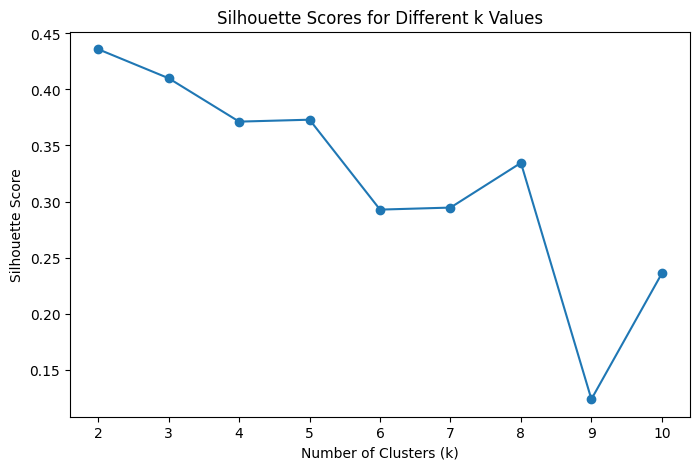

The optimal number of clusters is: 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total_Spending,Cluster
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
1,2,F,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,18,1
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,5,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
4,5,F,10,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,1,16,1


In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Selecting only the brand columns for clustering
brand_columns = df.columns[3:]

# Scaling the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[brand_columns])

# Determine the optimal number of clusters using silhouette score
silhouette_scores = []
k_values = range(2, 11)  # Testing for k from 2 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores to visualize the best k
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different k Values")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

# Select the best k (highest silhouette score)
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters is: {optimal_k}")

# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_df)

# Display the first few rows with the cluster labels
df.head()


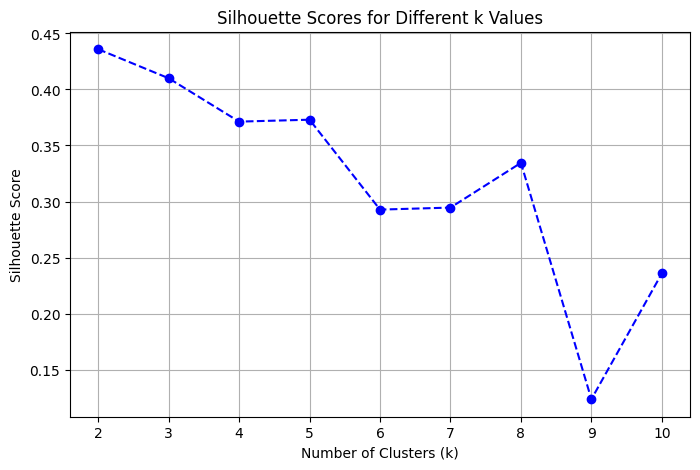

In [37]:
import matplotlib.pyplot as plt

# Plot the silhouette scores to visualize the best k
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', color='b')
plt.title("Silhouette Scores for Different k Values")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


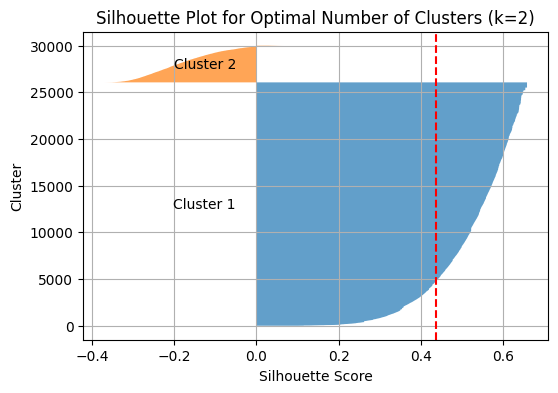

In [39]:
from sklearn.metrics import silhouette_samples
import numpy as np

# Calculate silhouette scores for the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_df)
silhouette_avg = silhouette_score(scaled_df, cluster_labels)
sample_silhouette_values = silhouette_samples(scaled_df, cluster_labels)

# Create a silhouette plot
plt.figure(figsize=(6, 4))
y_lower, y_upper = 0, 0
for i in range(optimal_k):
    # Aggregate the silhouette scores for samples in cluster i
    cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    cluster_silhouette_values.sort()
    y_upper += len(cluster_silhouette_values)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_silhouette_values,
                      alpha=0.7)
    plt.text(-0.05, (y_lower + y_upper) / 2,
             f'Cluster {i + 1}', va='center', ha='right')
    y_lower += len(cluster_silhouette_values)

plt.title(f'Silhouette Plot for Optimal Number of Clusters (k={optimal_k})')
plt.xlabel('Silhouette Score')
plt.ylabel('Cluster')
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.grid(True)
plt.show()
